### Merge sort 的想法:

一開始在禮拜二的演習課有聽老師講解Merge Sort的一些邏輯概念，

所以對他比較了解一點，因此我選擇先做Merge Sort。

首先我先在紙上畫了一次Merge Sort排序的過程，

並且按照慣例把我有想到的條件限制等先寫下來。
    

### 寫在紙上的想法如下

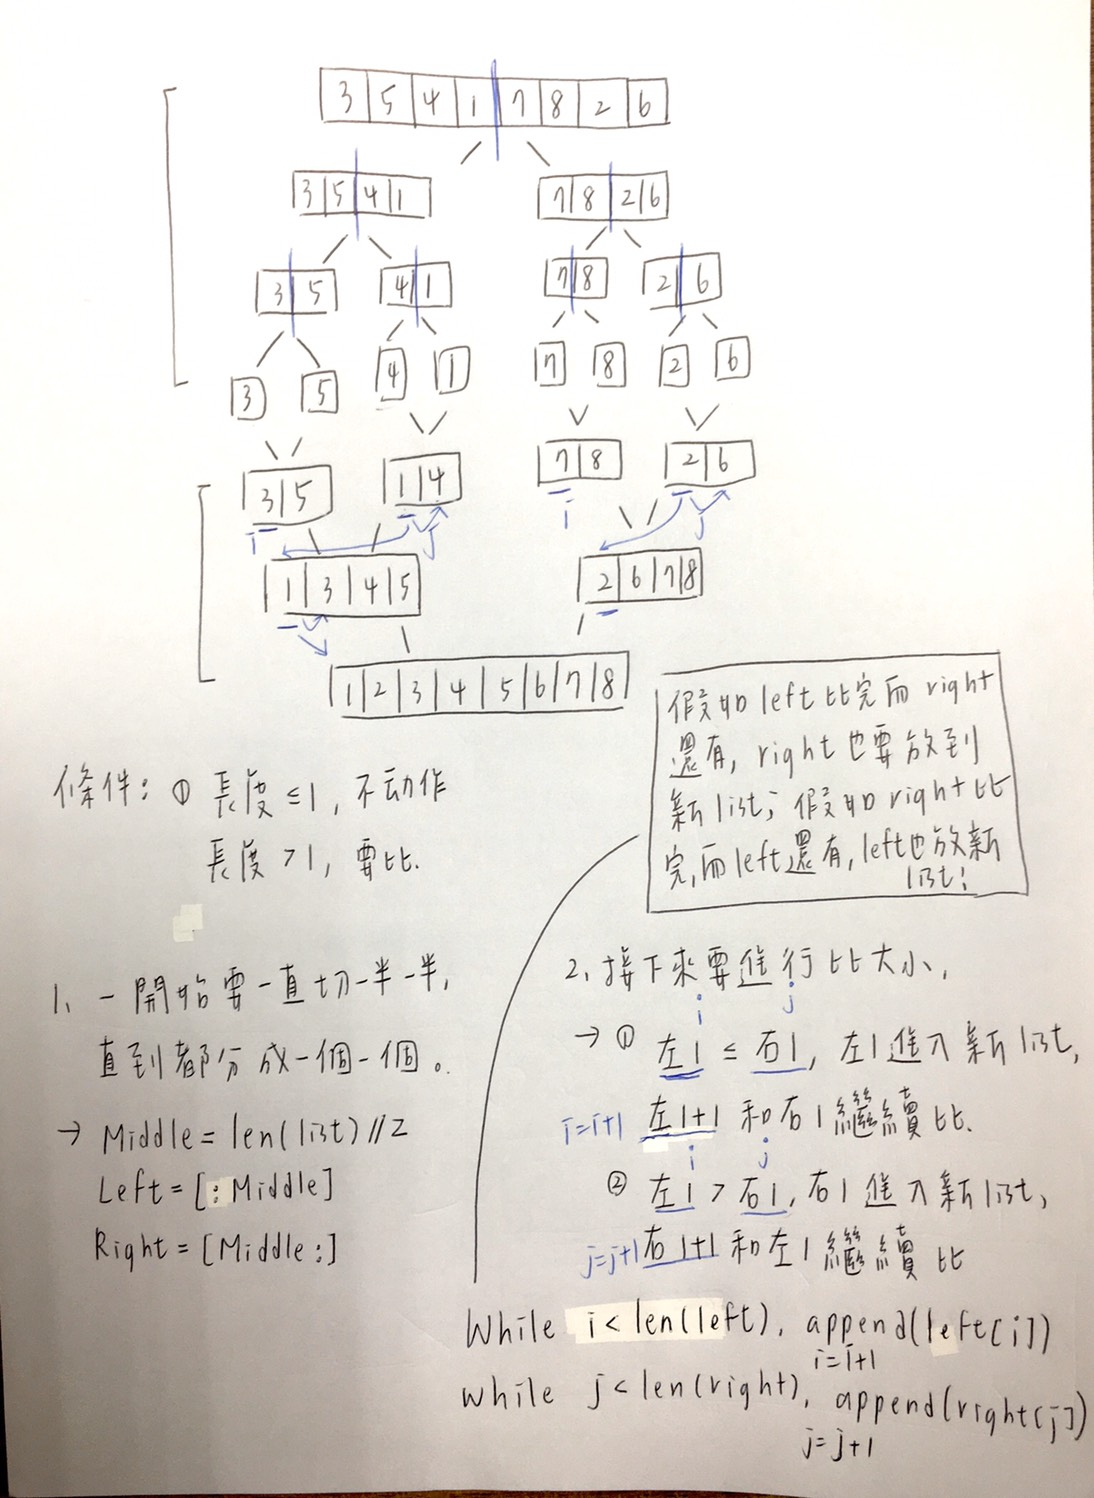

In [1]:
from IPython.display import Image
Image(filename="C:/Users/may50/Desktop/merge_sort_thinking.jpg")

### 我認為Merge Sort 分成兩個主要部分:

1. 要一直對半分，分到都是一個一個後

2. 才可以開始做比大小排列，最後整合


### Step 1:

所以我先想要怎麼讓他一半一半分，

並且打了以下的程式碼:

首先，我想到如果是空值或是只有一個數字的話，就不需要排列，

如果超過一個數字的話才需要做接下來的動作。

我根據這串數字的長度，將他切一半，

所以設了一個叫做Middle為長度除以2，

將分好的分別放入 Left 與 Right，

Left是前半部；Right是後半部。


In [48]:
class Solution(object):
    def merge_sort(self, nums):
        """
        :type nums: List[int] ex:[3,2,-4,6,4,2,19],[5,1,1,2,0,0]
        :rtype: List[int] ex:[-4,2,2,3,4,6,19],[0,0,1,1,2,5]
        """
    
        if len(nums) <= 1:
            return nums
        
        else:
          
            Middle = len(nums)//2
            Left = nums[:Middle]
            Right = nums[Middle:]
            
        return [Left,Right]

並且做一個測試，看我一開始這樣寫有沒有做對。

In [49]:
Solution().merge_sort([4,2,1,5,7,3])

[[4, 2, 1], [5, 7, 3]]

### Result 1:

測試結果跟我預想的一樣，

但我後來發現這只會分一次而已，

我們需要的是將它分到最後都是一個一個的才能去做比較等等。

### Step 2:

因此我想到，可以向Quick Sort一樣使用recursive的功能，

讓Left 跟 Right分完一次後，還可以繼續對半分，直到分到都是一個一個List才停止。

In [50]:
class Solution(object):
    def merge_sort(self, nums):
        """
        :type nums: List[int] ex:[3,2,-4,6,4,2,19],[5,1,1,2,0,0]
        :rtype: List[int] ex:[-4,2,2,3,4,6,19],[0,0,1,1,2,5]
        """
    
        if len(nums) <= 1:
            return nums
        
        else:
          
            Middle = len(nums)//2
            Left = nums[:Middle]
            Right = nums[Middle:]
            
            Left = self.merge_sort(Left)
            Right = self.merge_sort(Right)
        
        return [Left,Right]

並且再做一個測試，看我這樣想是不是可行的。

In [53]:
Solution().merge_sort([4,2,1,7,5,3])

[[[4], [[2], [1]]], [[7], [[5], [3]]]]

### Result 2:

我發現這樣的想法是對的，

因此，分割的部分就到這邊。

我要開始想要如何將這些分成一個一個數的List進行比大小並且整合好。

### Step 3:

我想到老師之前上課帶我們做過一次Merge Sort的流程。

我決定按照這樣的流程去想。

首先在排序好的兩堆(Left,Right)中，

我都先去取第一個位置的數字去做比較，

倘若左邊第一個位置的數字小於或等於右邊第一個位置的數字的話，

我在這邊新建立一個空的List，叫做Merge，

用來裝我比較完這個比較小的數字，一樣也是從index=0的位置開始，

同時，左邊的List跳下一個位置的數字，再去和右邊第一個位置的數字做比較，

以此類退，直到最後。

In [114]:
class Solution(object):
    def merge_sort(self, nums):
        """
        :type nums: List[int] ex:[3,2,-4,6,4,2,19],[5,1,1,2,0,0]
        :rtype: List[int] ex:[-4,2,2,3,4,6,19],[0,0,1,1,2,5]
        """
    
        if len(nums) <= 1:
            return nums
        
        else:
          
            Middle = len(nums)//2
            Left = nums[:Middle]
            Right = nums[Middle:]
        
            Left = self.merge_sort(Left)
            Right = self.merge_sort(Right)           
            
            
            Merge = [] 
            m = 0
            i = 0
            j = 0
                        
            while i < len(Left) and j < len(Right):
                
                if Left[i] <= Right[j]:
                    Merge[m] = Left[i]
                    i = i+1
                    m = m+1
                    
                else:
                    Merge[m] = Right[j]
                    j = j+1
                    m = m+1
                    
            return Merge
                    
    

所以我又做了一個測試，看看我的想法有沒有錯。

In [115]:
Solution().merge_sort([4,2,1,7,5,3])

IndexError: list assignment index out of range

### Result 3:

我發現我這樣跑出來的結果是錯的，

因此我上網查這項錯誤的意思是甚麼?

我發現list assignment index out of range 的意思是在說:

列表的索引分配超出列範圍，原因是因為我定義的Merge是一個空的List，

而Merge[0]本身不存在，所以自然也不能呼叫。

參考網址: https://www.itread01.com/content/1542243859.html


### Step 4:

而遇到這樣的問題可以有2種解決方式:

1. append的方式，將元素加進去

2. insert的方式，將元素插入List中

因為我對append 相對熟悉一點，

所以我想說那不然就用append試試看好了。

In [118]:
class Solution(object):
    def merge_sort(self, nums):
        """
        :type nums: List[int] ex:[3,2,-4,6,4,2,19],[5,1,1,2,0,0]
        :rtype: List[int] ex:[-4,2,2,3,4,6,19],[0,0,1,1,2,5]
        """
    
        if len(nums) <= 1:
            return nums
        
        else:
          
            Middle = len(nums)//2
            Left = nums[:Middle]
            Right = nums[Middle:]
            
            Left = self.merge_sort(Left)
            Right = self.merge_sort(Right)
            
            Merge = []                   
            i = 0
            j = 0 

            while i < len(Left) and j < len(Right):
                if Left[i] <= Right[j]:
                    Merge.append(Left[i])
                    i = i+1
                    
                else:
                    Merge.append(Right[j])
                    j = j+1
                    
            return Merge 

做個測試，看看我這樣打有沒有錯。

In [119]:
Solution().merge_sort([3,7,5,4,2,8])

[2]

### Result 4:

我發現利用append將元素加進去，這樣的方法是可行的。

但是這樣跑出來的結果還是有錯!!!

因為我的程式碼跑完的結果只有將最小的數字加到新的List裡面，

其他的元素都沒有跑出來。

為了看我是錯在哪，我將我的List進行Merge Sort的過程用手寫的方式寫過一次，

我猜我這樣寫好像只會比出了最小的那個數，後面就沒繼續進行了。


為了測試，我又在輸入一串數字。

In [120]:
Solution().merge_sort([9,5,2,4,6])

[2]

結果好像真的是這樣。

於是我又繼續想，

要怎麼樣才可以將還沒比完的數字，也一併放進去Merge這個List裡面。

### Step 5:

我想到我在上面那段程式碼中，

好像只進行了一次，後面當有其中一個List裡面沒有值的話，也不會再進行下去。

於是我就開始想我是不是還少了甚麼沒有打進去。

後來我發現，有可能一個List比完但其他List還有數值的話，

我沒有想到這部分，

正確的話，應該還是要繼續也讓他加到新的List裡面，這樣才算完整的Merge Sort。

所以我又添加了幾句程式碼。

In [121]:
class Solution(object):
    def merge_sort(self, nums):
        """
        :type nums: List[int] ex:[3,2,-4,6,4,2,19],[5,1,1,2,0,0]
        :rtype: List[int] ex:[-4,2,2,3,4,6,19],[0,0,1,1,2,5]
        """
    
        if len(nums) <= 1:
            return nums
        
        else:
          
            Middle = len(nums)//2
            Left = nums[:Middle]
            Right = nums[Middle:]
            
            Left = self.merge_sort(Left)
            Right = self.merge_sort(Right)
            
            Merge = []                   
            i = 0
            j = 0 

            while i < len(Left) and j < len(Right):
                if Left[i] <= Right[j]:
                    Merge.append(Left[i])
                    i = i+1
                    
                else:
                    Merge.append(Right[j])
                    j = j+1
           
            while i < len(Left):
                Merge.append(Left[i])
                i = i+1
                
            while j < len(Right):
                Merge.append(Right[j])
                j = j+1
             
        
        return Merge
    

做一個測試，看看我的程式有沒有錯。

In [122]:
Solution().merge_sort([4,2,1,7,5,3])

[1, 2, 3, 4, 5, 7]

### Result 5:

發現是對的。

### - - - - 完 成 Merge  Sort - - - -

### 最後附上Merge Sort的流程圖

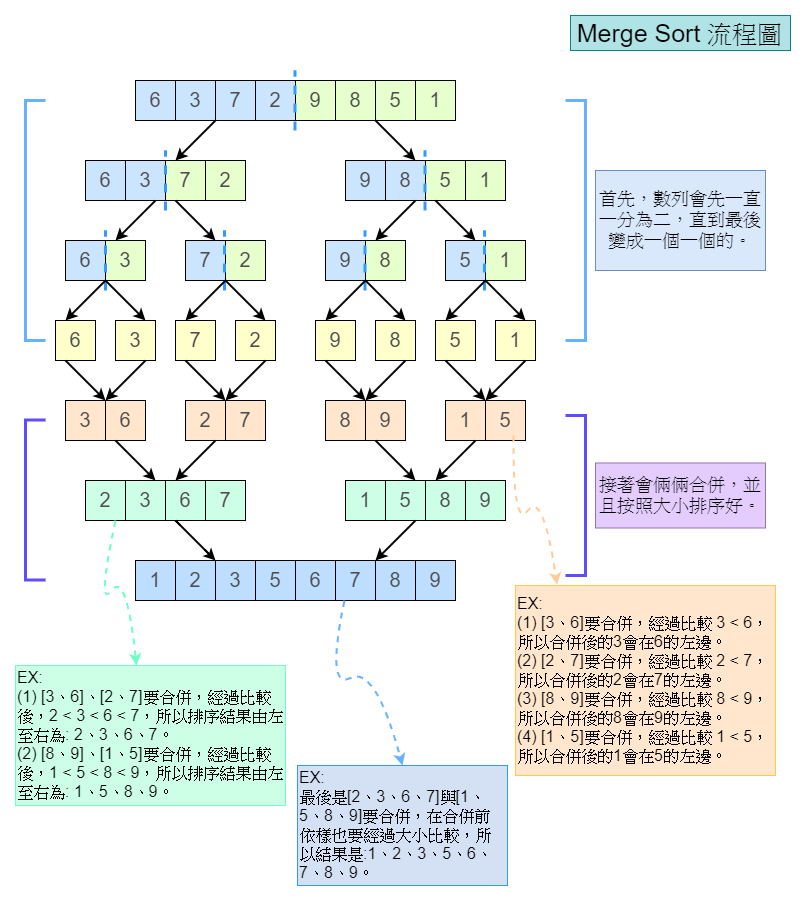

In [4]:
Image(filename="C:/Users/may50/Desktop/merge_sort.png")